In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 불러오기
file_path = 'output/매출매입현황_20251106_093119.xlsx'
df = pd.read_excel(file_path)

# 첫 행 컬럼 처리
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

# 컬럼명 통일
df = df.rename(columns={
    '기안일': '기안일',
    '기안부서': '부서',
    '구분': '구분',
    '거래처명': '거래처명',
    '공급가액': '공급가액',
    '부가세': '부가세',
    '합계금액': '합계금액'
})

# 타입 변환
df['기안일'] = pd.to_datetime(df['기안일'], errors='coerce')
for col in ['공급가액', '부가세', '합계금액']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 0, NaN 제거
df = df.dropna(subset=['합계금액'])
df = df[df['합계금액'] != 0]

# 월 컬럼 추가
df['월'] = df['기안일'].dt.to_period('M')


C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (\

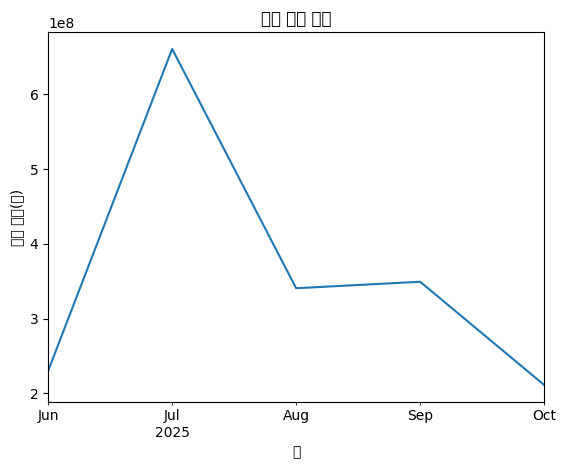

In [2]:
# ======================================================
# ① 월별 매출 추이 (라인)
# ======================================================
monthly_sales = df[df['구분'] == '매출'].groupby('월')['합계금액'].sum()

plt.figure()
monthly_sales.plot(kind='line')
plt.title('월별 매출 추이')
plt.xlabel('월')
plt.ylabel('매출 합계(원)')
plt.show()

<Figure size 640x480 with 0 Axes>

C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (

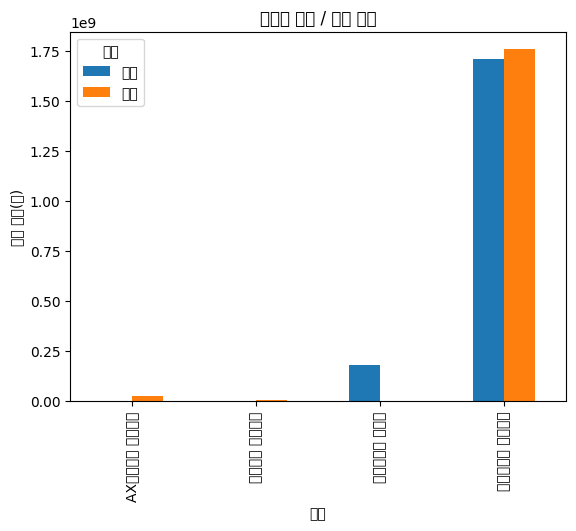

In [3]:
# ======================================================
# ② 부서별 매출 / 매입 규모 비교 (막대)
# ======================================================
dept_summary = df.groupby(['부서', '구분'])['합계금액'].sum().unstack(fill_value=0)

plt.figure()
dept_summary.plot(kind='bar')
plt.title('부서별 매출 / 매입 비교')
plt.xlabel('부서')
plt.ylabel('금액 합계(원)')
plt.show()

<Figure size 640x480 with 0 Axes>

C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50896 (

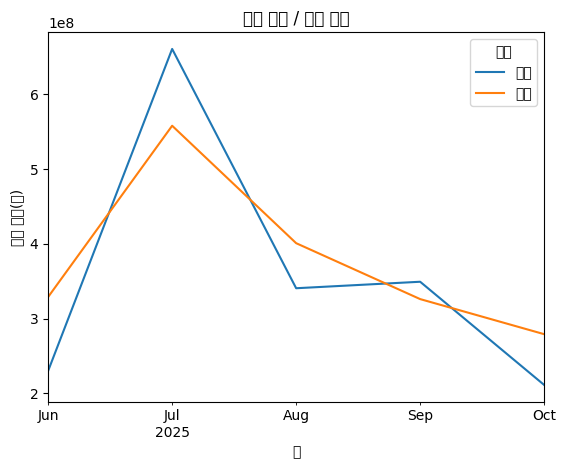

In [6]:
# ======================================================
# ④ 매출 대비 매입 비율 / 순이익 관점
# ======================================================
monthly_compare = df.groupby(['월', '구분'])['합계금액'].sum().unstack(fill_value=0)
monthly_compare['매출대비매입비율'] = monthly_compare['매입'] / monthly_compare['매출']

# 매출 vs 매입
plt.figure()
monthly_compare[['매출', '매입']].plot(kind='line')
plt.title('월별 매출 / 매입 추이')
plt.xlabel('월')
plt.ylabel('금액 합계(원)')
plt.show()

C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50984 (\N{

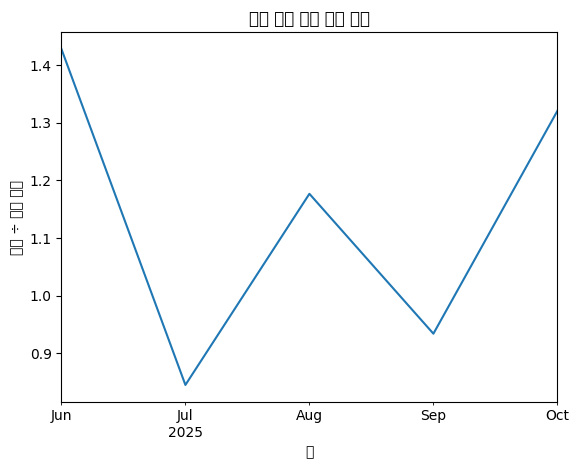

In [7]:
# 매출 대비 매입 비율
plt.figure()
monthly_compare['매출대비매입비율'].plot(kind='line')
plt.title('매출 대비 매입 비율 추이')
plt.xlabel('월')
plt.ylabel('매입 ÷ 매출 비율')
plt.show()